In [1]:
from IPython.display import Audio
from scipy.io import wavfile

In [2]:
%matplotlib inline

import matplotlib
import numpy
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (17., 3.)

In [3]:
from blizzard import Blizzard
from utils import mgcf02wav, mgcf0sp2wav
dataset = Blizzard(which_sets = ('train',), filename = "mgc_blizzard_sentence.hdf5")

/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
from fuel.schemes import ShuffledExampleScheme
from fuel.streams import DataStream
data_stream = DataStream.default_stream(
                dataset,
                iteration_scheme=ShuffledExampleScheme(dataset.num_examples))
epoch_iterator = data_stream.get_epoch_iterator()
print dataset.sources

(u'f0', u'mgc', u'spectrum', u'transcripts', u'voicing_str')


# Blizzard Data Exploration

# Audio Reconstruction

In [5]:
f0, mgc, spectrum, transcripts, voicing_str = next(epoch_iterator)

## Text

In [6]:
all_chars = ([chr(ord('A') + i) for i in range(26)] + [' ', '<UNK>'])
code2char = dict(enumerate(all_chars))
print "".join([code2char[x].lower() for x in transcripts])

right down and over her feet


## Reconstructed MGC

In [7]:
sr = 16000
x_synth = mgcf02wav(mgc, f0)
x_synth = .95 * x_synth/max(abs(x_synth)) * 2**15
Audio(data = x_synth.astype('int16'), rate = sr)

## Reconstructed MGC + voicing strings

In [8]:
sr = 16000
x_synth = mgcf0sp2wav(mgc, f0, voicing_str)
x_synth = .95 * x_synth/max(abs(x_synth)) * 2**15
Audio(data = x_synth.astype('int16'), rate = sr)

# MGC

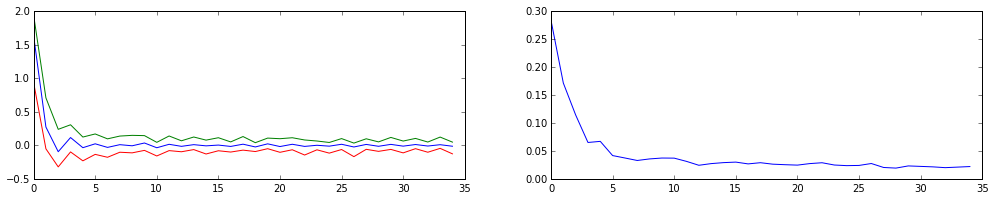

In [9]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(mgc.mean(axis=0));
ax1.plot(mgc.max(axis=0));
ax1.plot(mgc.min(axis=0));
ax2.plot(mgc.std(axis=0));

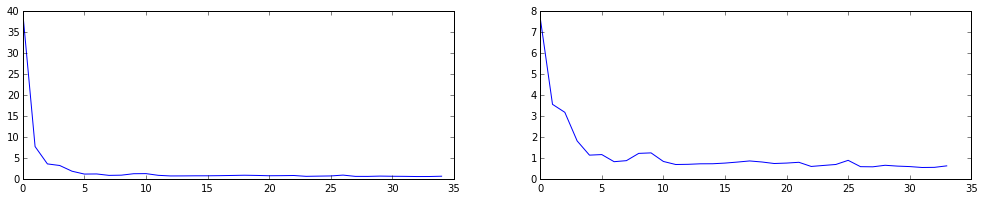

In [10]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(numpy.linalg.norm(mgc,axis=0));
ax2.plot(numpy.linalg.norm(mgc[:,1:],axis=0));

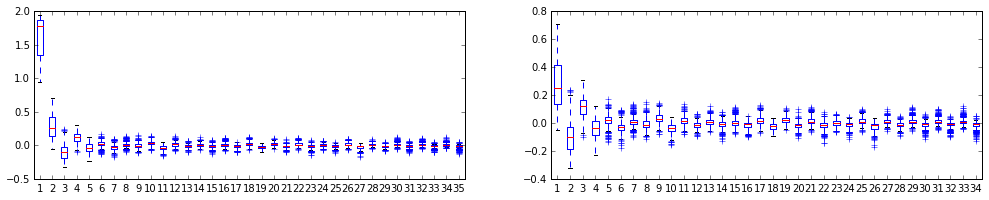

In [11]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.boxplot(mgc);
ax2.boxplot(mgc[:,1:]);

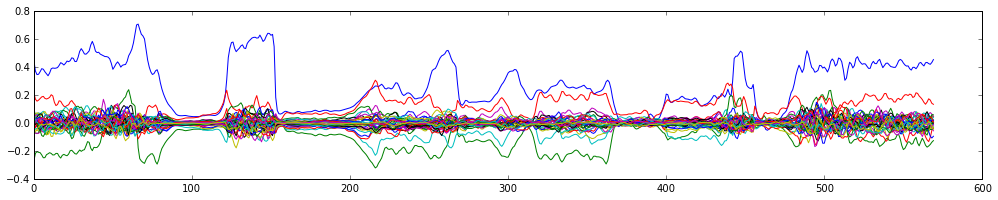

In [12]:
pyplot.plot(mgc[:,1:]);

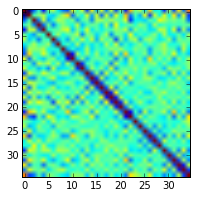

In [13]:
pyplot.imshow(numpy.corrcoef(mgc.T));

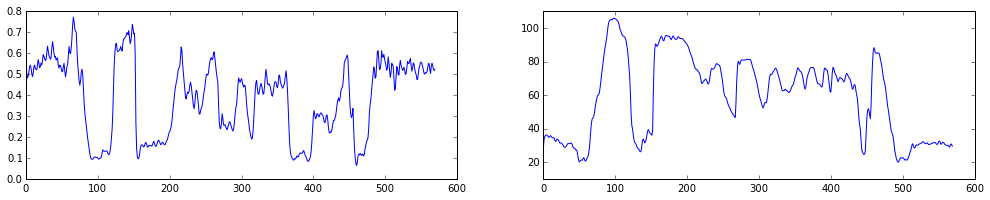

In [14]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(numpy.linalg.norm(mgc[:,1:],axis=1));
ax2.plot(numpy.linalg.norm(spectrum,axis=1));

/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


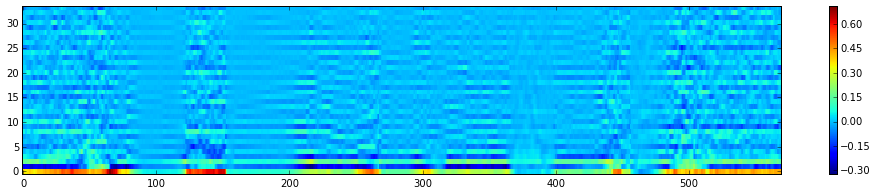

In [15]:
pyplot.imshow(mgc[:,1:].T, aspect = 'auto', interpolation = 'nearest', origin = 'lower');
pyplot.colorbar();

## Spectrum

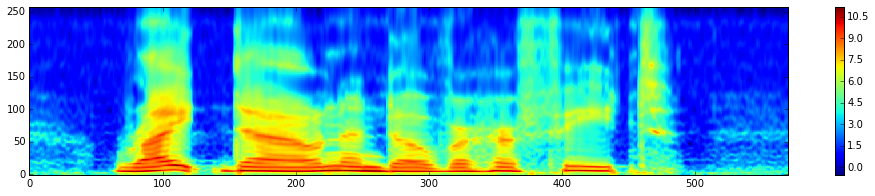

In [16]:
pyplot.imshow(spectrum.T, origin = 'lower', aspect = 'auto', interpolation = 'nearest');
pyplot.colorbar();

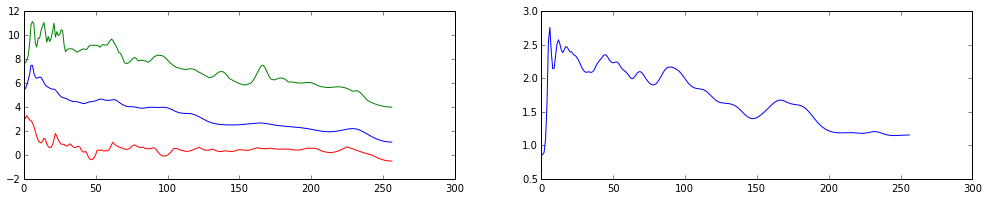

In [17]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(spectrum.mean(axis=0));
ax1.plot(spectrum.max(axis=0));
ax1.plot(spectrum.min(axis=0));
ax2.plot(spectrum.std(axis=0));

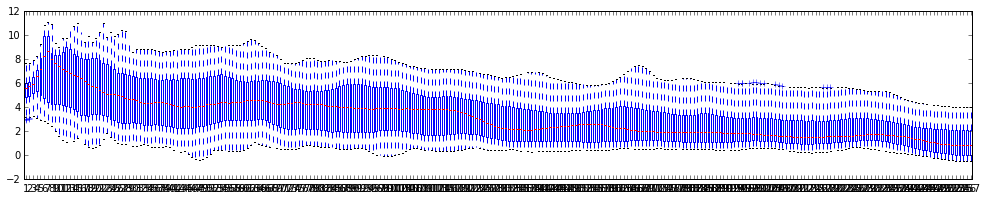

In [18]:
pyplot.boxplot(spectrum);

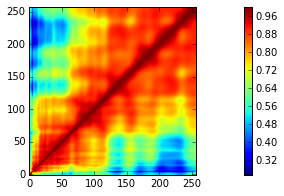

In [19]:
pyplot.imshow(numpy.corrcoef(spectrum.T), origin = 'lower');
pyplot.colorbar();

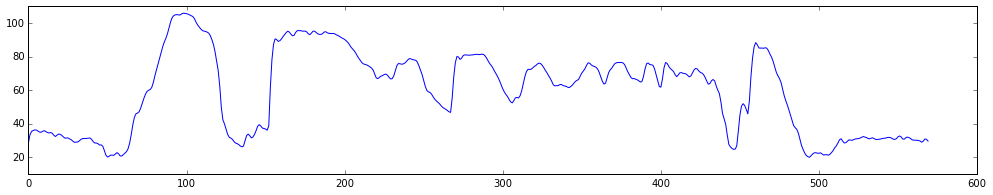

In [20]:
pyplot.plot(numpy.linalg.norm(spectrum,axis=1));

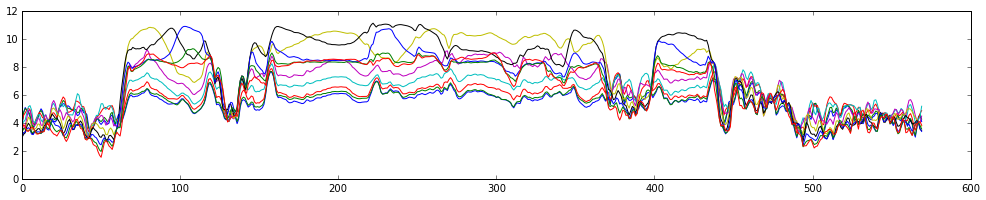

In [21]:
pyplot.plot(spectrum[:,:10]);

## Pitch

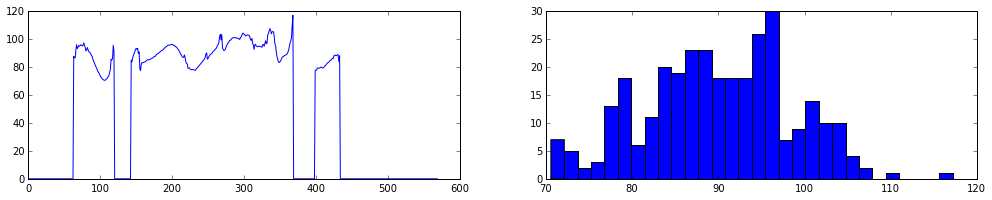

In [22]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(f0)
ax2.hist(f0[f0>0], bins = 30);

## Voicing Str

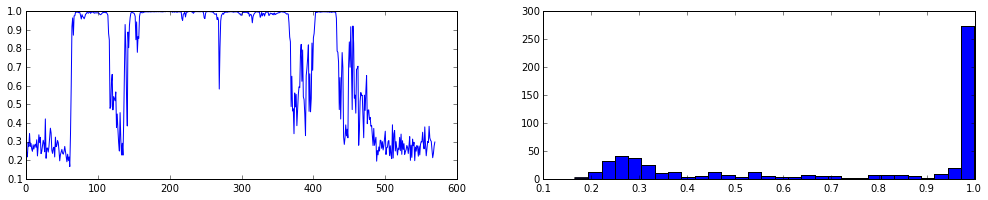

In [23]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,0])
ax2.hist(voicing_str[:,0], bins = 30);

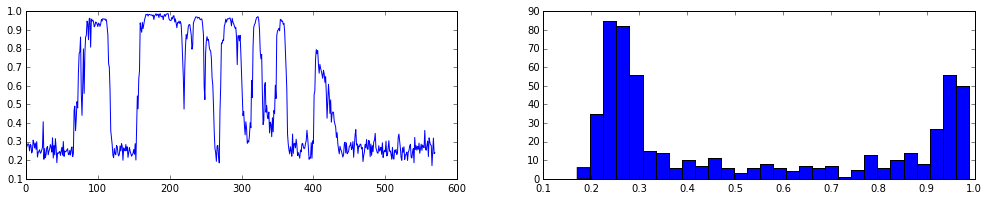

In [24]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,1])
ax2.hist(voicing_str[:,1], bins = 30);

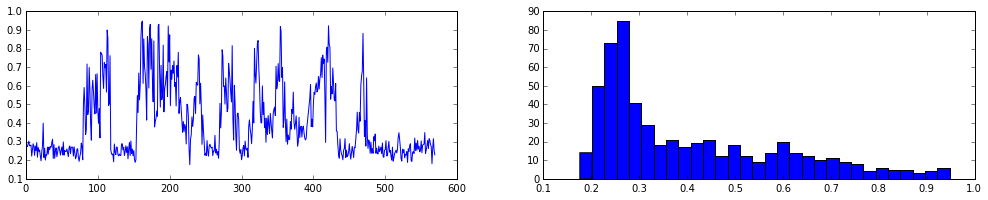

In [25]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,2])
ax2.hist(voicing_str[:,2], bins = 30);

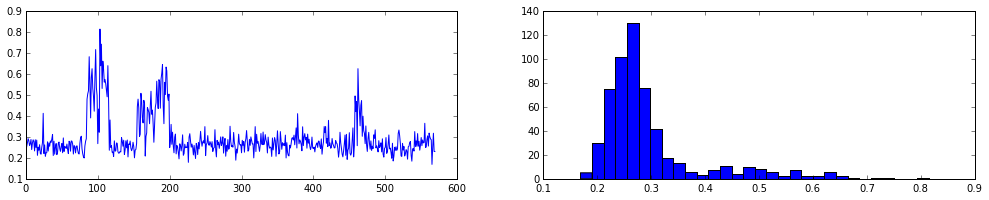

In [26]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,3])
ax2.hist(voicing_str[:,3], bins = 30);

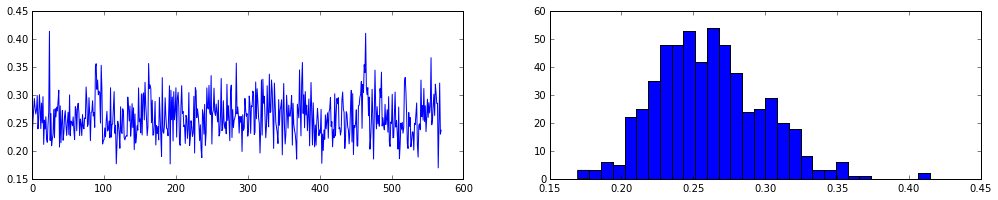

In [27]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,4])
ax2.hist(voicing_str[:,4], bins = 30);

# Normalization

In [28]:
import os
data_dir = os.environ['FUEL_DATA_PATH']
data_dir = os.path.join(data_dir, 'blizzard/', 'full_standardize.npz')
data_stats = numpy.load(data_dir)

mean_f0 = data_stats['mean_f0']
mean_mgc = data_stats['mean_mgc']
mean_spectrum = data_stats['mean_spectrum']
mean_voicing_str = data_stats['mean_voicing_str']

std_f0 = data_stats['std_f0']
std_mgc = data_stats['std_mgc']
std_spectrum = data_stats['std_spectrum']
std_voicing_str = data_stats['std_voicing_str']

In [29]:
spectrum_standardized = (spectrum-mean_spectrum)/std_spectrum
mgc_standardized = (mgc-mean_mgc)/std_mgc

In [30]:
numpy.percentile(spectrum_standardized,1)

-1.9395874559879303

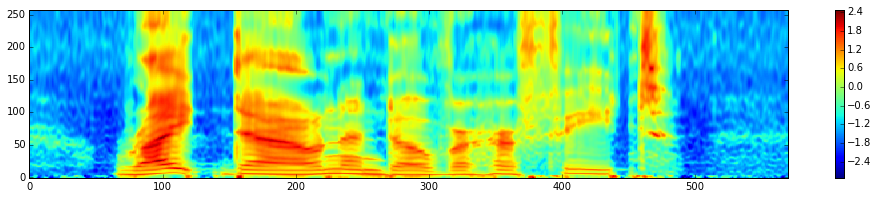

In [31]:
pyplot.imshow(spectrum_standardized.T, origin = 'lower', aspect = 'auto', interpolation = 'nearest');
pyplot.colorbar();

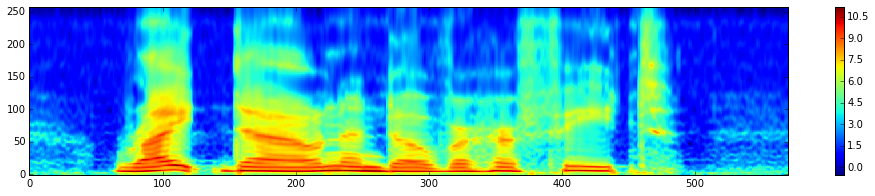

In [32]:
pyplot.imshow(spectrum.T, origin = 'lower', aspect = 'auto', interpolation = 'nearest');
pyplot.colorbar();

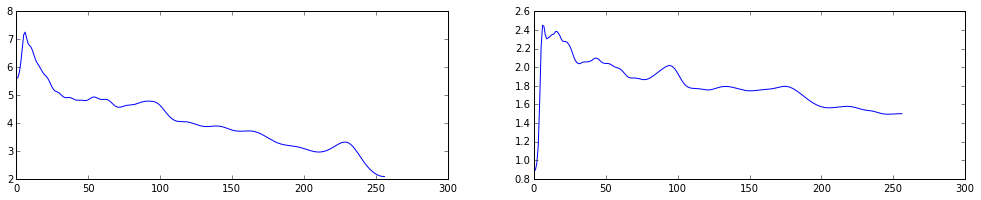

In [33]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(mean_spectrum);
ax2.plot(std_spectrum);

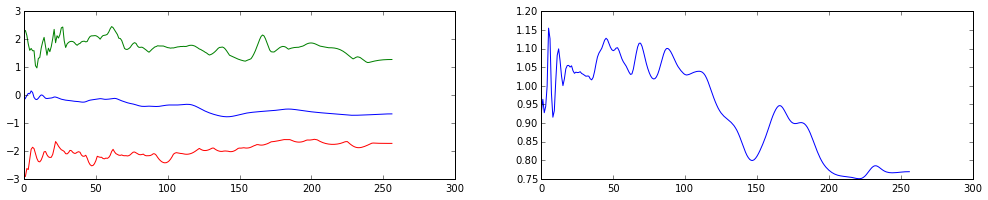

In [34]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(spectrum_standardized.mean(axis=0));
ax1.plot(spectrum_standardized.max(axis=0));
ax1.plot(spectrum_standardized.min(axis=0));
ax2.plot(spectrum_standardized.std(axis=0));

## Raw data

In [6]:
from blizzard import Blizzard

In [7]:
dataset = Blizzard(('train',))

In [8]:
data_stream = dataset.get_example_stream()

In [9]:
data_example = next(data_stream.get_epoch_iterator())

In [10]:
Audio(data_example[0], rate = 16000)

In [11]:
Q_LEVELS=256
def batch_quantize(data):

    eps = numpy.float64(1e-5)

    data -= data.min(axis=1)[:, None]
    data *= ((Q_LEVELS - eps) / data.max(axis=1)[:, None])
    data += eps/2

    data = data.astype('int32')

    return data

def standardize(data):
    data = data.astype('int64')
    mind = data.min()
    maxd = data.max()
    data = (data - mind) / float(maxd - mind)
    return 2.*data - 1.

In [12]:
data_example_bit8 = batch_quantize(standardize(data_example[0].reshape(1,-1)))

In [13]:
Audio(data_example_bit8, rate = 16000)

In [19]:
from fuel.schemes import ConstantScheme, ShuffledExampleScheme, ShuffledScheme
from fuel.streams import DataStream

In [22]:
data_stream = DataStream(dataset, iteration_scheme=ShuffledScheme(64,dataset.num_examples))

In [28]:
data_stream.sources

(u'features',)